In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

#replace with your path
train_path = r"C:\Users\hivan\OneDrive\Documents\insta-fake-detector\data\raw\train.csv"
test_path  = r"C:\Users\hivan\OneDrive\Documents\insta-fake-detector\data\raw\test.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

train.head()
test.head()


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [3]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

train.info()

Train shape: (576, 12)
Test shape: (120, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [4]:
train.describe()


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


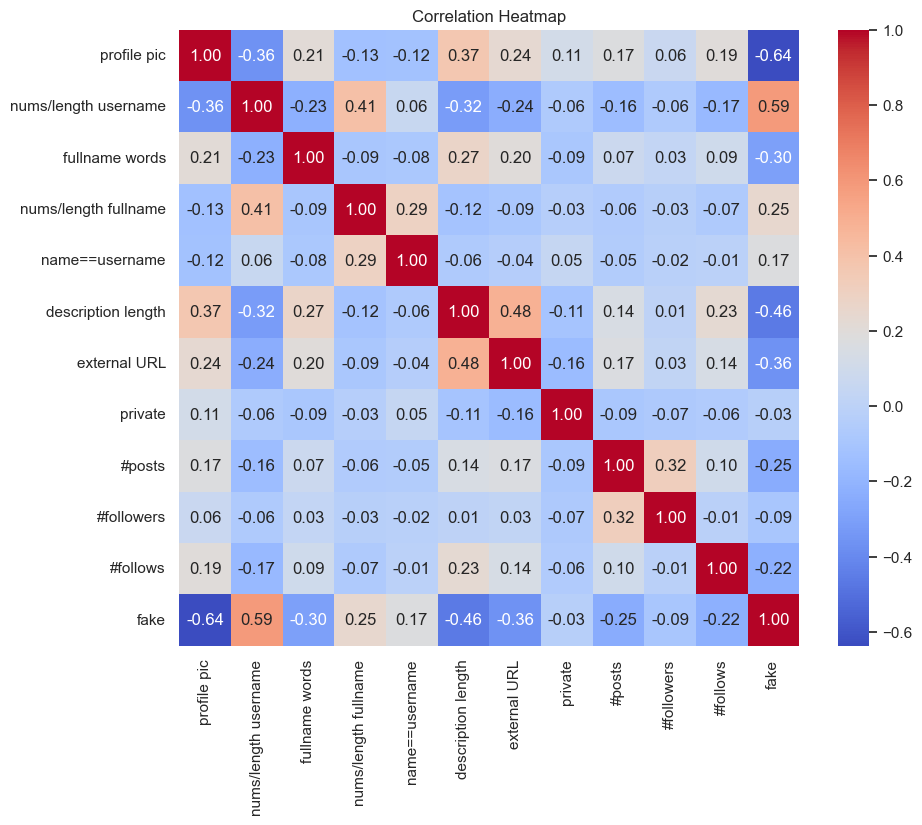

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

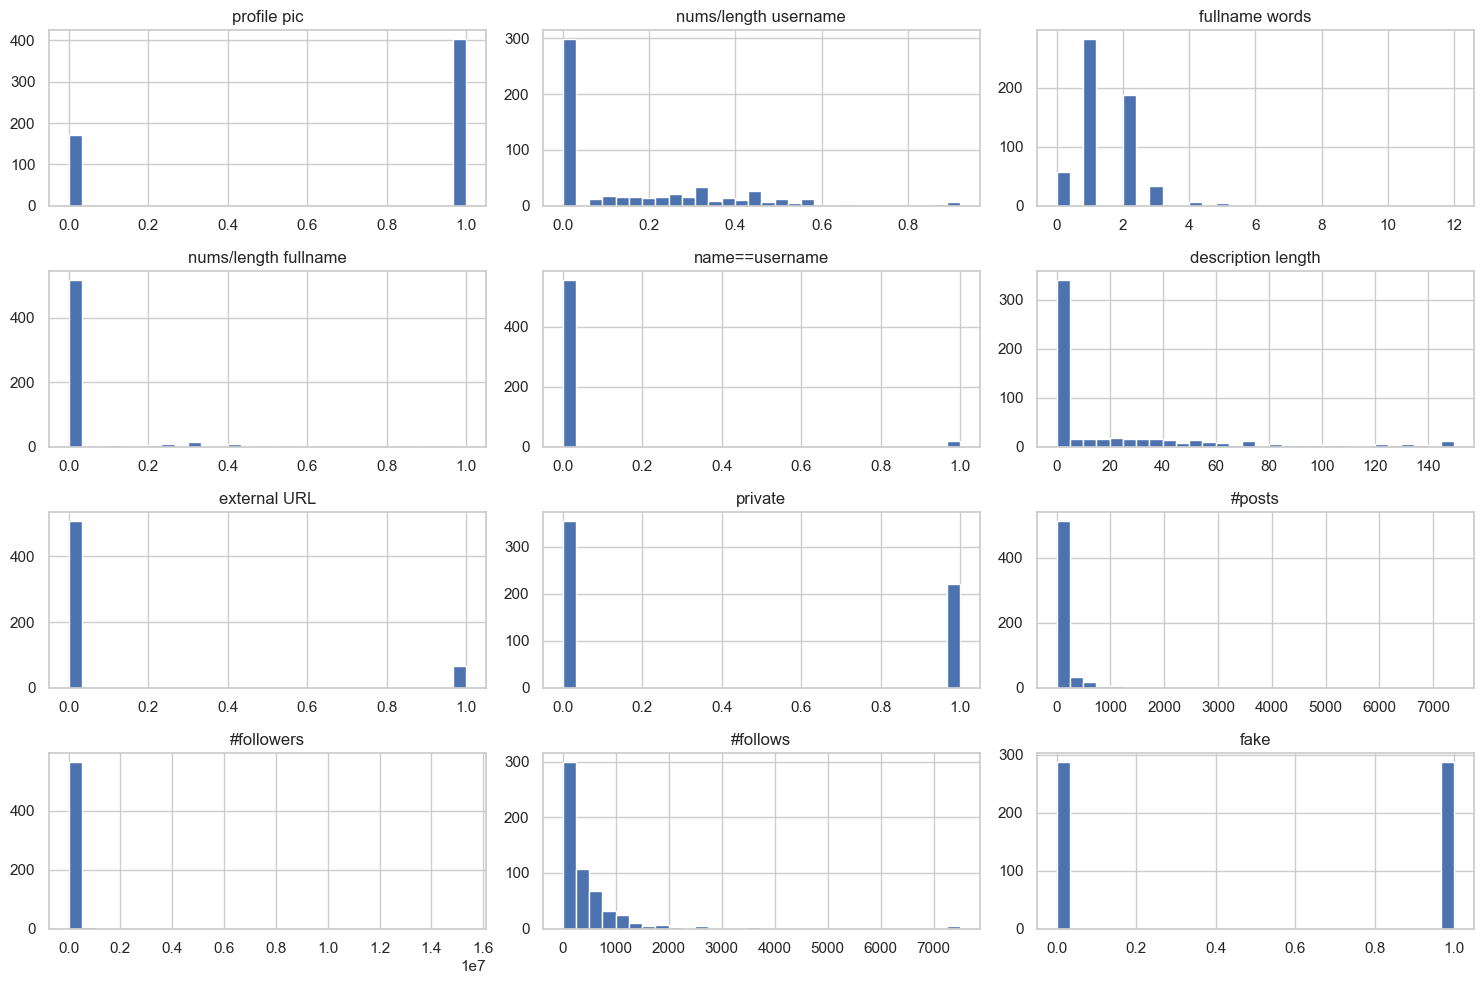

In [6]:
train.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


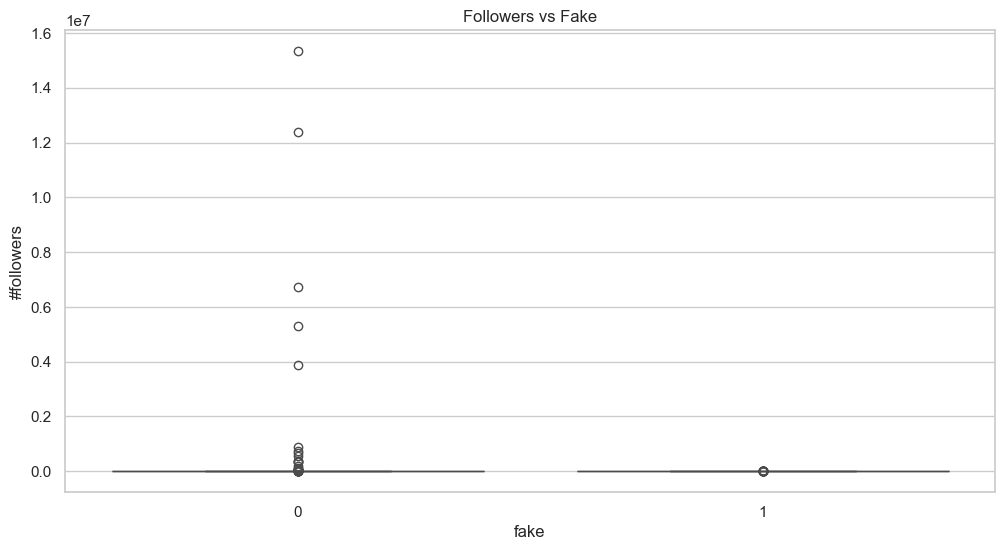

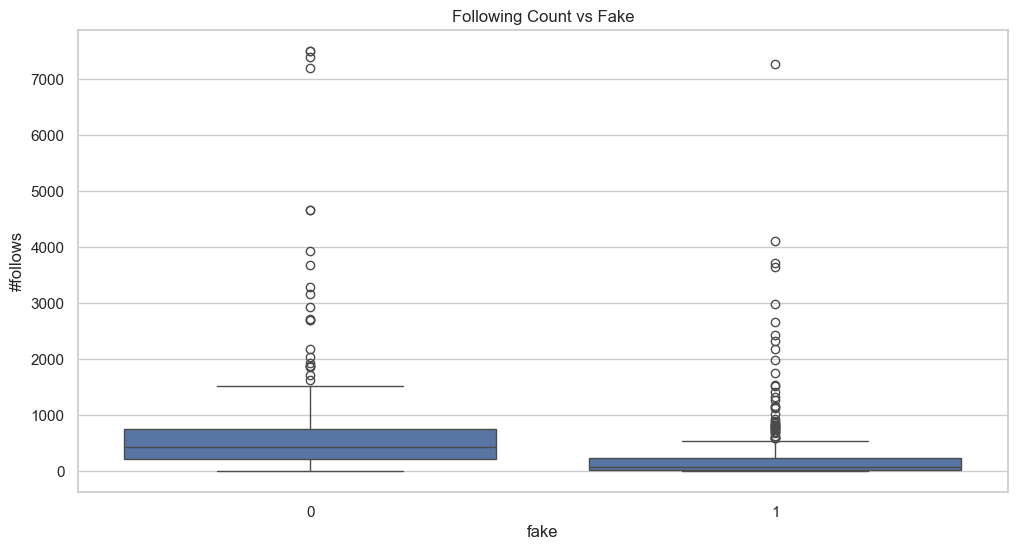

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='fake', y='#followers')
plt.title("Followers vs Fake")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='fake', y='#follows')
plt.title("Following Count vs Fake")
plt.show()


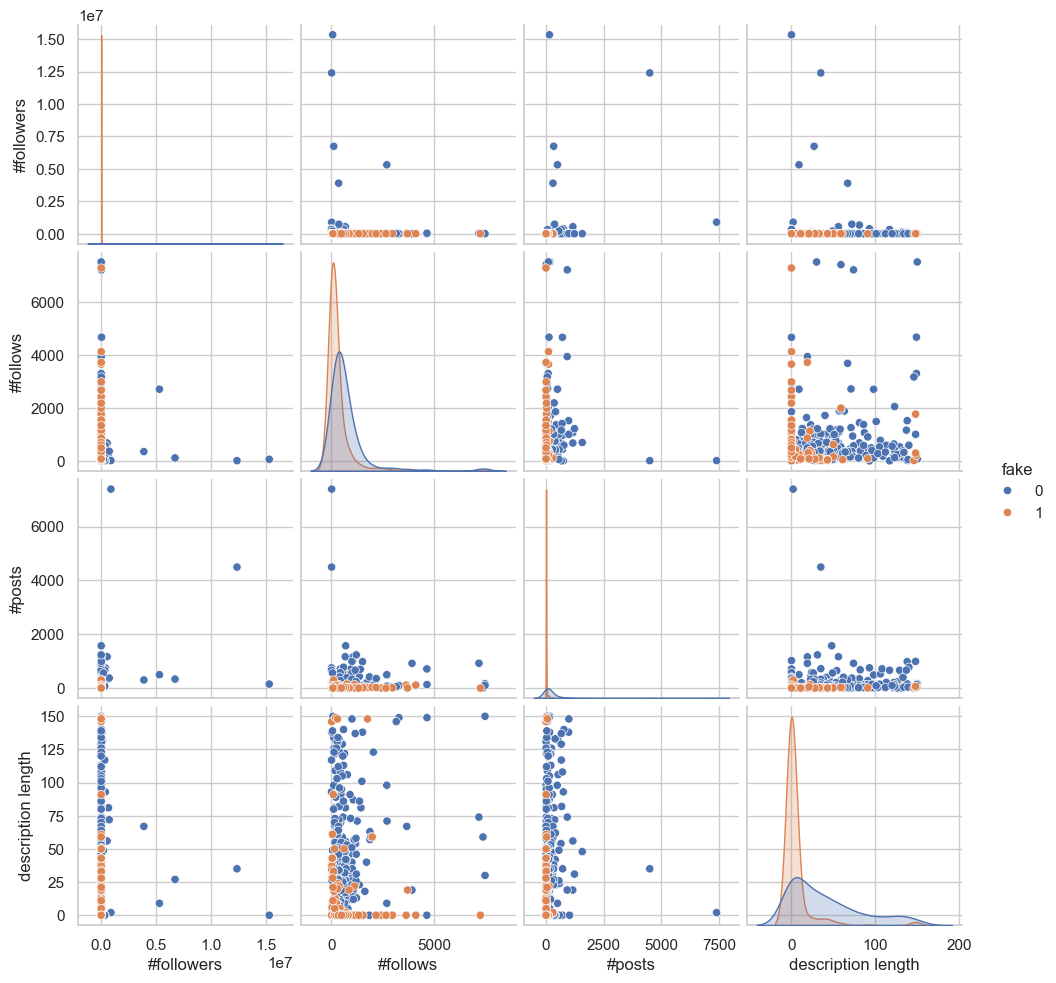

In [8]:
sns.pairplot(train, hue='fake', vars=['#followers', '#follows', '#posts', 'description length'])
plt.show()


In [9]:

# FEATURE ENGINEERING


In [10]:
# 1. Create follower/following ratio (add +1 to avoid division by zero)
train["follow_ratio"] = train["#followers"] / (train["#follows"] + 1)

# 2. Log-transform highly skewed numeric columns
skewed_cols = ["#followers", "#follows", "#posts", "description length"]

for col in skewed_cols:
    train[f"log_{col}"] = np.log1p(train[col])

# 3. Binary flags for empty / zero fields (helps linear models!)
train["no_description"] = (train["description length"] == 0).astype(int)
train["no_posts"] = (train["#posts"] == 0).astype(int)

# 4. Replace any possible infinities from ratio
train.replace([np.inf, -np.inf], 0, inplace=True)

# 5. Quick preview of new features
train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,follow_ratio,log_#followers,log_#follows,log_#posts,log_description length,no_description,no_posts
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0,1.046025,6.908755,6.862758,3.496508,3.988984,0,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0,5.131086,7.916078,6.280396,5.659482,3.806662,0,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0,1.606061,5.075174,4.595120,2.639057,0.000000,1,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0,0.634969,6.028279,6.480045,6.522093,4.418841,0,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0,1.188976,5.023881,4.844187,1.945910,0.000000,1,0


In [11]:
# PREPROCESSING

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ----------------------------
# 1. Select feature columns
# ----------------------------
feature_cols = [
    "profile pic", "nums/length username", "fullname words",
    "nums/length fullname", "name==username", "description length",
    "external URL", "private", "#posts", "#followers", "#follows",
    "follow_ratio", "log_#followers", "log_#follows", "log_#posts",
    "log_description length", "no_description", "no_posts"
]

X = train[feature_cols]
y = train["fake"]

# ----------------------------
# 2. Train-validation split
# ----------------------------
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# 3. Identify numeric & binary columns
# ----------------------------
numeric_cols = [
    "#posts", "#followers", "#follows",
    "description length", "follow_ratio",
    "log_#followers", "log_#follows", "log_#posts",
    "log_description length"
]

binary_cols = list(set(feature_cols) - set(numeric_cols))

# ----------------------------
# 4. Scaling step
# ----------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("binary", "passthrough", binary_cols)
    ]
)

# ----------------------------
# 5. Build a reusable pipeline template
# ----------------------------
def build_pipeline(model):
    return Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])

print("Preprocessing pipeline ready!")
print("Train shape:", X_train.shape, "| Validation shape:", X_val.shape)


Preprocessing pipeline ready!
Train shape: (460, 18) | Validation shape: (116, 18)


Logistic Regression — Validation Performance
Accuracy : 0.940
Precision: 0.932
Recall   : 0.948
F1 Score : 0.940
ROC AUC  : 0.982


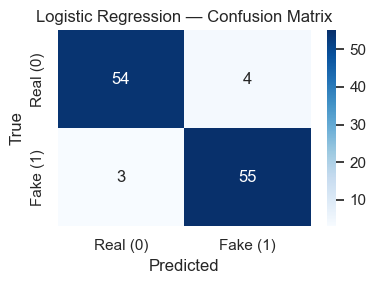

In [13]:

# MODEL 1 — LOGISTIC REGRESSION


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# Build pipeline with preprocessing + logistic regression
logreg_model = LogisticRegression(
    max_iter=1000,        # allow enough iterations to converge
    solver="lbfgs"        # standard solver used in class-style demos
)
logreg_pipe = build_pipeline(logreg_model)

# Fit on training data
logreg_pipe.fit(X_train, y_train)

# Predict on validation set
y_pred_log = logreg_pipe.predict(X_val)
y_proba_log = logreg_pipe.predict_proba(X_val)[:, 1]

# Metrics
acc_log  = accuracy_score(y_val, y_pred_log)
prec_log = precision_score(y_val, y_pred_log)
rec_log  = recall_score(y_val, y_pred_log)
f1_log   = f1_score(y_val, y_pred_log)
auc_log  = roc_auc_score(y_val, y_proba_log)

print("Logistic Regression — Validation Performance")
print(f"Accuracy : {acc_log:.3f}")
print(f"Precision: {prec_log:.3f}")
print(f"Recall   : {rec_log:.3f}")
print(f"F1 Score : {f1_log:.3f}")
print(f"ROC AUC  : {auc_log:.3f}")

# Confusion matrix
cm_log = confusion_matrix(y_val, y_pred_log)

plt.figure(figsize=(4, 3))
sns.heatmap(
    cm_log, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Real (0)", "Fake (1)"],
    yticklabels=["Real (0)", "Fake (1)"]
)
plt.title("Logistic Regression — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


SVM (RBF) — Validation Performance
Accuracy : 0.914
Precision: 0.900
Recall   : 0.931
F1 Score : 0.915
ROC AUC  : 0.981


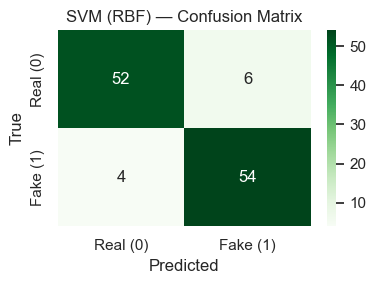

In [14]:

# MODEL 2 — SVM (RBF KERNEL)


from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# SVM with RBF kernel, like in class SVM labs (margin-based, non-linear)
svm_model = SVC(
    kernel="rbf",
    C=1.0,              # regularization (can tune later)
    gamma="scale",      # default RBF kernel width
    probability=True    # needed for ROC AUC
)
svm_pipe = build_pipeline(svm_model)

# Fit on training data
svm_pipe.fit(X_train, y_train)

# Predict on validation set
y_pred_svm = svm_pipe.predict(X_val)
y_proba_svm = svm_pipe.predict_proba(X_val)[:, 1]

# Metrics
acc_svm  = accuracy_score(y_val, y_pred_svm)
prec_svm = precision_score(y_val, y_pred_svm)
rec_svm  = recall_score(y_val, y_pred_svm)
f1_svm   = f1_score(y_val, y_pred_svm)
auc_svm  = roc_auc_score(y_val, y_proba_svm)

print("SVM (RBF) — Validation Performance")
print(f"Accuracy : {acc_svm:.3f}")
print(f"Precision: {prec_svm:.3f}")
print(f"Recall   : {rec_svm:.3f}")
print(f"F1 Score : {f1_svm:.3f}")
print(f"ROC AUC  : {auc_svm:.3f}")

# Confusion matrix
cm_svm = confusion_matrix(y_val, y_pred_svm)

plt.figure(figsize=(4, 3))
sns.heatmap(
    cm_svm, annot=True, fmt="d", cmap="Greens",
    xticklabels=["Real (0)", "Fake (1)"],
    yticklabels=["Real (0)", "Fake (1)"]
)
plt.title("SVM (RBF) — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


Random Forest — Validation Performance
Accuracy : 0.905
Precision: 0.873
Recall   : 0.948
F1 Score : 0.909
ROC AUC  : 0.980


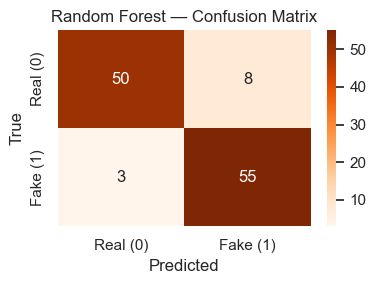

In [15]:

# MODEL 3 — RANDOM FOREST


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest — many trees, bagging + feature randomness
rf_model = RandomForestClassifier(
    n_estimators=300,   # number of trees (can tune)
    max_depth=None,     # let trees grow fully; ensemble controls overfitting
    random_state=42
)
rf_pipe = build_pipeline(rf_model)
rf_pipe.fit(X_train, y_train)

y_pred_rf = rf_pipe.predict(X_val)
y_proba_rf = rf_pipe.predict_proba(X_val)[:, 1]

# Metrics
acc_rf  = accuracy_score(y_val, y_pred_rf)
prec_rf = precision_score(y_val, y_pred_rf)
rec_rf  = recall_score(y_val, y_pred_rf)
f1_rf   = f1_score(y_val, y_pred_rf)
auc_rf  = roc_auc_score(y_val, y_proba_rf)

print("Random Forest — Validation Performance")
print(f"Accuracy : {acc_rf:.3f}")
print(f"Precision: {prec_rf:.3f}")
print(f"Recall   : {rec_rf:.3f}")
print(f"F1 Score : {f1_rf:.3f}")
print(f"ROC AUC  : {auc_rf:.3f}")

# Confusion matrix
cm_rf = confusion_matrix(y_val, y_pred_rf)

plt.figure(figsize=(4, 3))
sns.heatmap(
    cm_rf, annot=True, fmt="d", cmap="Oranges",
    xticklabels=["Real (0)", "Fake (1)"],
    yticklabels=["Real (0)", "Fake (1)"]
)
plt.title("Random Forest — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


Validation Performance Comparison:


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,
Logistic Regression,0.940,0.932,0.948,0.940,0.982
SVM (RBF),0.914,0.900,0.931,0.915,0.981
Random Forest,0.905,0.873,0.948,0.909,0.980


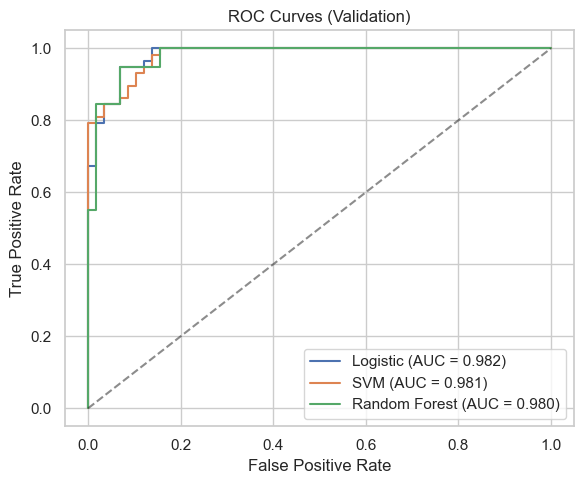

Top Logistic Regression Coefficients (largest absolute effect on 'fake'):


,feature,coefficient
5,log_#followers,-2.929013
13,nums/length username,2.733696
10,profile pic,-2.004436
12,no_posts,1.182606
15,external URL,-1.065745
7,log_#posts,-0.885060
14,nums/length fullname,0.735892
8,log_description length,-0.692042
6,log_#follows,0.657772
16,private,-0.615399


In [16]:

# MODEL COMPARISON & INTERPRETATION


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. COMPARISON TABLE  -----------------------------------------

results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM (RBF)", "Random Forest"],
    "Accuracy": [acc_log, acc_svm, acc_rf],
    "Precision": [prec_log, prec_svm, prec_rf],
    "Recall": [rec_log, rec_svm, rec_rf],
    "F1 Score": [f1_log, f1_svm, f1_rf],
    "ROC AUC": [auc_log, auc_svm, auc_rf]
}).set_index("Model")

print("Validation Performance Comparison:")
display(results_df.round(3))


# 2. ROC CURVES FOR ALL MODELS  --------------------------------

# Recompute probabilities to be safe (in case variables were cleared)
y_proba_log = logreg_pipe.predict_proba(X_val)[:, 1]
y_proba_svm = svm_pipe.predict_proba(X_val)[:, 1]
y_proba_rf  = rf_pipe.predict_proba(X_val)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_val, y_proba_log)
fpr_svm, tpr_svm, _ = roc_curve(y_val, y_proba_svm)
fpr_rf,  tpr_rf,  _ = roc_curve(y_val, y_proba_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC = {auc_log:.3f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.3f})")
plt.plot(fpr_rf,  tpr_rf,  label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot([0, 1], [0, 1], "k--", alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Validation)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


# 3. LOGISTIC REGRESSION COEFFICIENTS  -------------------------

# Get trained logistic regression model from the pipeline
logreg = logreg_pipe.named_steps["model"]

# Feature order in the pipeline: numeric_cols then binary_cols (as defined in Step B)
all_feature_names = numeric_cols + binary_cols

coefs = logreg.coef_[0]
coef_df = pd.DataFrame({
    "feature": all_feature_names,
    "coefficient": coefs,
    "abs_coeff": np.abs(coefs)
}).sort_values("abs_coeff", ascending=False)

print("Top Logistic Regression Coefficients (largest absolute effect on 'fake'):")
display(coef_df[["feature", "coefficient"]].head(10))


In [24]:
# =========================================================
# STEP D (FINAL): FINAL MODEL SELECTION + FINAL TRAINING SETUP
# =========================================================

# ---------------------------------------------------------
# 0) FINAL MODEL CHOICE (based on Step C validation)
# ---------------------------------------------------------
final_model_name = "Logistic Regression"
print(f"Final model selected: {final_model_name} (best validation + interpretable)")

# ---------------------------------------------------------
# 1) COMBINE TRAIN + VALIDATION DATA
# ---------------------------------------------------------
X_final = pd.concat([X_train, X_val], axis=0)
y_final = pd.concat([y_train, y_val], axis=0)

print("Combined labeled data (train+val) shape:", X_final.shape)

# ---------------------------------------------------------
# 2) CREATE HELD-OUT TEST SET (20%)
#    This TEST set is used ONLY ONCE in Step E.
# ---------------------------------------------------------
X_train_final, X_test, y_train_final, y_test = train_test_split(
    X_final,
    y_final,
    test_size=0.20,
    stratify=y_final,
    random_state=42
)

print("Final training shape:", X_train_final.shape)
print("Final test shape    :", X_test.shape)

# ---------------------------------------------------------
# 3) REBUILD PREPROCESSOR (same as before)
#    numeric_cols + binary_cols must already exist from Step B
# ---------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("bin", "passthrough", binary_cols),
    ],
    remainder="drop"
)

# ---------------------------------------------------------
# 4) DEFINE + TRAIN FINAL LOGISTIC REGRESSION PIPELINE
# ---------------------------------------------------------
final_logreg_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(
        penalty="l2",
        C=1.0,
        solver="liblinear",
        random_state=42
    ))
])

final_logreg_pipe.fit(X_train_final, y_train_final)

print("Final Logistic Regression model trained on final training split.")
print("Ready for Step E: final evaluation on the held-out test set.")


Final model selected: Logistic Regression (best validation + interpretable)
Combined labeled data (train+val) shape: (576, 18)
Final training shape: (460, 18)
Final test shape    : (116, 18)
Final Logistic Regression model trained on final training split.
Ready for Step E: final evaluation on the held-out test set.


FINAL TEST PERFORMANCE (Logistic Regression)
Accuracy  : 0.940
Precision : 0.964
Recall    : 0.914
F1 Score  : 0.938
ROC AUC   : 0.992


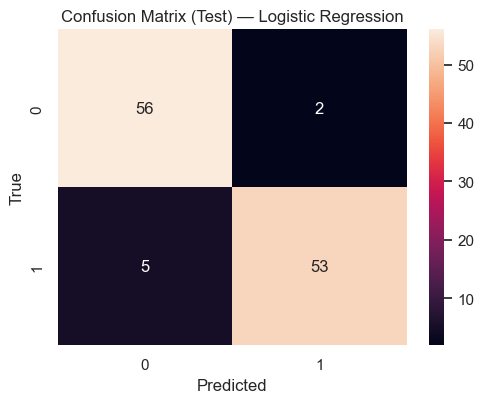

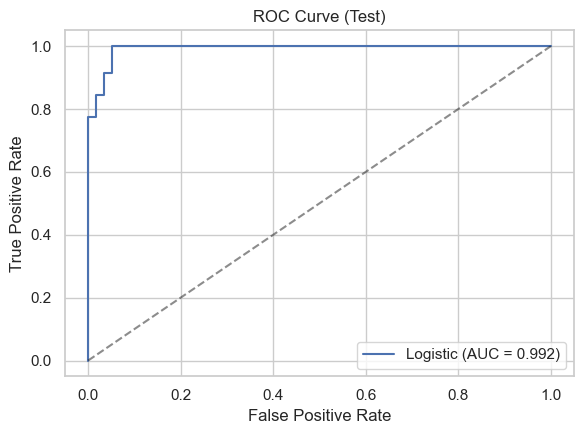

In [25]:
# =========================================================
# STEP E: FINAL EVALUATION ON HELD-OUT TEST SET (RUN ONCE)
# =========================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)

# 1) Predict probabilities + labels on TEST
y_test_proba = final_logreg_pipe.predict_proba(X_test)[:, 1]
y_test_pred  = (y_test_proba >= 0.5).astype(int)

# 2) Metrics
acc  = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred, pos_label=1)
rec  = recall_score(y_test, y_test_pred, pos_label=1)
f1   = f1_score(y_test, y_test_pred, pos_label=1)
auc_ = roc_auc_score(y_test, y_test_proba)

print("FINAL TEST PERFORMANCE (Logistic Regression)")
print(f"Accuracy  : {acc:.3f}")
print(f"Precision : {prec:.3f}")
print(f"Recall    : {rec:.3f}")
print(f"F1 Score  : {f1:.3f}")
print(f"ROC AUC   : {auc_:.3f}")

# 3) Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)  # rows=true, cols=pred
plt.figure(figsize=(5.2, 4.2))
sns.heatmap(cm, annot=True, fmt="d", cbar=True)
plt.title("Confusion Matrix (Test) — Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# 4) ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.figure(figsize=(6, 4.5))
plt.plot(fpr, tpr, label=f"Logistic (AUC = {auc_:.3f})")
plt.plot([0, 1], [0, 1], "k--", alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


ERROR COUNTS (Test)
False Positives (Real predicted Fake): 2
False Negatives (Fake predicted Real): 5

Key features used in error analysis: ['log_#followers', 'log_#follows', 'log_#posts', 'log_description length', 'nums/length username', 'profile pic', 'external URL', 'private', 'no_posts']

MEAN FEATURE COMPARISON (Test vs Errors)


,All_Test_mean,FalsePos_mean,FalseNeg_mean
log_#followers,5.134,3.478,5.287
log_#follows,5.120,2.706,6.037
log_#posts,2.615,0.896,3.243
log_description length,1.525,0.000,1.039
nums/length username,0.189,0.095,0.100
profile pic,0.733,1.000,1.000
external URL,0.121,0.000,0.000
private,0.397,0.500,0.200
no_posts,0.284,0.000,0.000


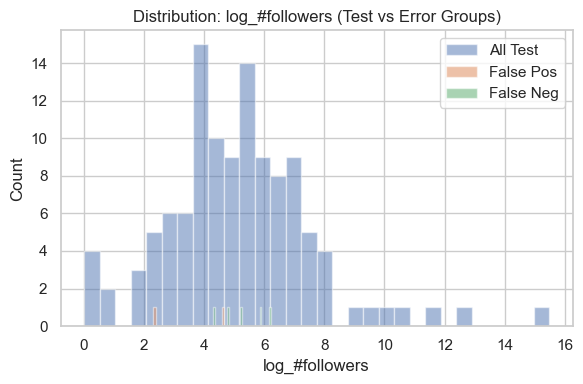

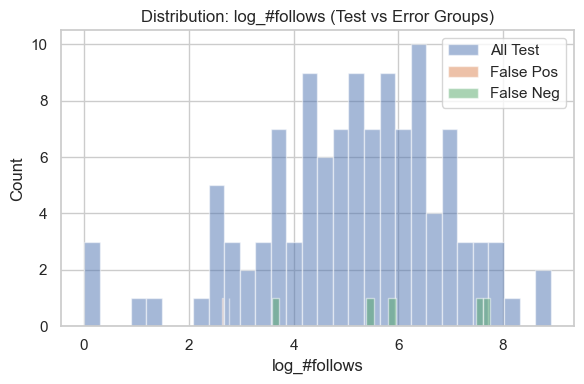

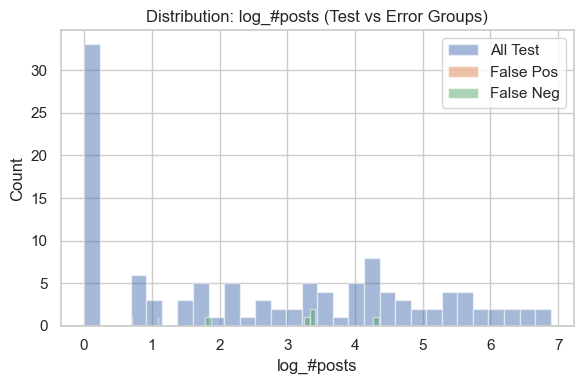

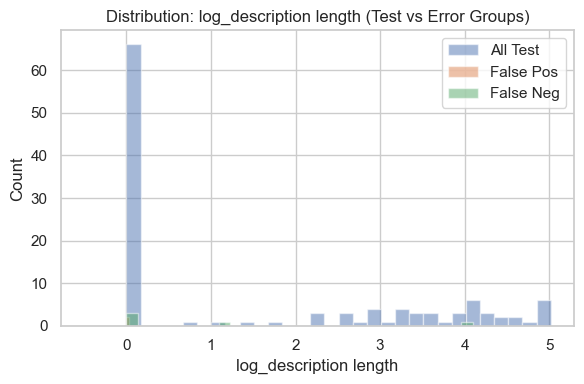


Most confident FALSE POSITIVES (Real predicted Fake):


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,follow_ratio,log_#followers,log_#follows,log_#posts,log_description length,no_description,no_posts,y_true,y_proba_fake,y_pred
53,1,0.00,2,0.0,0,0,0,1,2,9,13,0.642857,2.302585,2.639057,1.098612,0.0,1,0,0,0.838323,1
50,1,0.19,0,0.0,0,0,0,0,1,104,15,6.500000,4.653960,2.772589,0.693147,0.0,1,0,0,0.703636,1



Most confident FALSE NEGATIVES (Fake predicted Real):


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,follow_ratio,log_#followers,log_#follows,log_#posts,log_description length,no_description,no_posts,y_true,y_proba_fake,y_pred
33,1,0.25,1,0.0,0,2,0,1,5,182,227,0.798246,5.209486,5.429346,1.791759,1.098612,0,0,1,0.313475,0
83,1,0.00,3,0.0,0,0,0,0,29,122,336,0.362018,4.812184,5.820083,3.401197,0.000000,1,0,1,0.354552,0
5,1,0.00,0,0.0,0,0,0,0,77,73,35,2.027778,4.304065,3.583519,4.356709,0.000000,1,0,1,0.364638,0
36,1,0.00,2,0.0,0,0,0,0,26,505,2330,0.216645,6.226537,7.754053,3.295837,0.000000,1,0,1,0.396137,0
42,1,0.25,1,0.0,0,59,0,0,28,358,1990,0.179809,5.883322,7.596392,3.367296,4.094345,0,0,1,0.408404,0


In [26]:
# =========================================================
# STEP F: ERROR ANALYSIS (FALSE POSITIVES / FALSE NEGATIVES)
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Build a combined test dataframe for analysis
test_analysis = X_test.copy()
test_analysis = test_analysis.reset_index(drop=True)
test_analysis["y_true"] = y_test.reset_index(drop=True) if hasattr(y_test, "reset_index") else y_test
test_analysis["y_proba_fake"] = y_test_proba
test_analysis["y_pred"] = y_test_pred

# Define error groups
false_pos = test_analysis[(test_analysis["y_true"] == 0) & (test_analysis["y_pred"] == 1)]  # real -> predicted fake
false_neg = test_analysis[(test_analysis["y_true"] == 1) & (test_analysis["y_pred"] == 0)]  # fake -> predicted real

print("ERROR COUNTS (Test)")
print("False Positives (Real predicted Fake):", len(false_pos))
print("False Negatives (Fake predicted Real):", len(false_neg))

# Pick a few key features to inspect (adjust if your names differ)
key_feats = [c for c in ["log_#followers", "log_#follows", "log_#posts", "log_description length",
                         "nums/length username", "profile pic", "external URL", "private", "no_posts"]
             if c in test_analysis.columns]

print("\nKey features used in error analysis:", key_feats)

# Summary stats for each group
summary = pd.DataFrame({
    "All_Test_mean": test_analysis[key_feats].mean(numeric_only=True),
    "FalsePos_mean": false_pos[key_feats].mean(numeric_only=True) if len(false_pos) > 0 else np.nan,
    "FalseNeg_mean": false_neg[key_feats].mean(numeric_only=True) if len(false_neg) > 0 else np.nan,
}).round(3)

print("\nMEAN FEATURE COMPARISON (Test vs Errors)")
display(summary)

# Plot distributions for a few numeric features (quick + interpretable)
numeric_candidates = [f for f in key_feats if test_analysis[f].dtype != "int64" or f.startswith("log_") or "nums/" in f]
numeric_candidates = numeric_candidates[:4]  # keep it short and readable

for feat in numeric_candidates:
    plt.figure(figsize=(6, 4))
    plt.hist(test_analysis[feat].dropna(), bins=30, alpha=0.5, label="All Test")
    if len(false_pos) > 0:
        plt.hist(false_pos[feat].dropna(), bins=30, alpha=0.5, label="False Pos")
    if len(false_neg) > 0:
        plt.hist(false_neg[feat].dropna(), bins=30, alpha=0.5, label="False Neg")
    plt.title(f"Distribution: {feat} (Test vs Error Groups)")
    plt.xlabel(feat)
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Show most confident wrong predictions (useful for report narrative)
if len(false_pos) > 0:
    print("\nMost confident FALSE POSITIVES (Real predicted Fake):")
    display(false_pos.sort_values("y_proba_fake", ascending=False).head(5))

if len(false_neg) > 0:
    print("\nMost confident FALSE NEGATIVES (Fake predicted Real):")
    display(false_neg.sort_values("y_proba_fake", ascending=True).head(5))
